In [1]:
cd c:\dev\keras


c:\dev\keras


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/kc_house_data.csv')

In [4]:
# df.isnull().sum()
# df.describe().transpose()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<Axes: xlabel='price', ylabel='Count'>

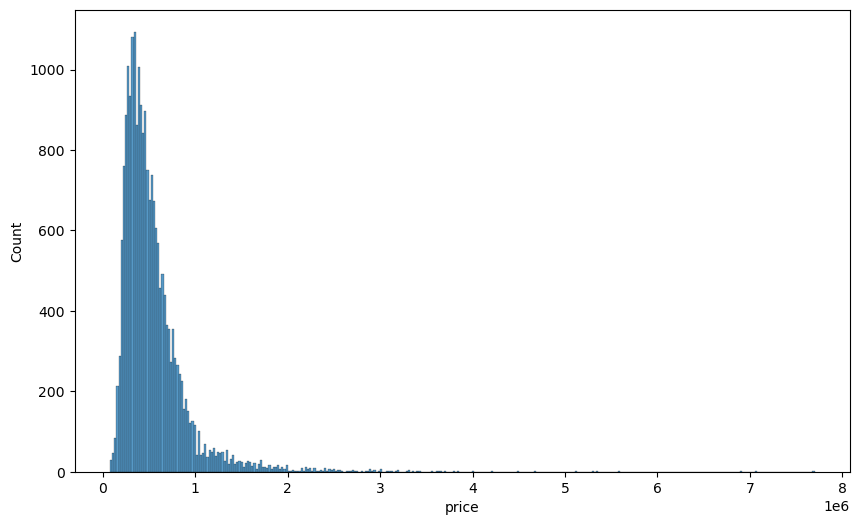

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'])

<Axes: xlabel='bedrooms', ylabel='Count'>

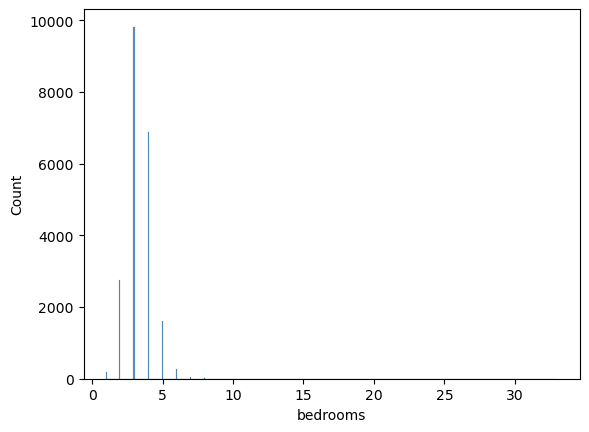

In [6]:
sns.histplot(df['bedrooms'])

In [7]:
df.corr()['price'].sort_values()

C:\Users\modki\AppData\Local\Temp\ipykernel_4728\321850276.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft_living'>

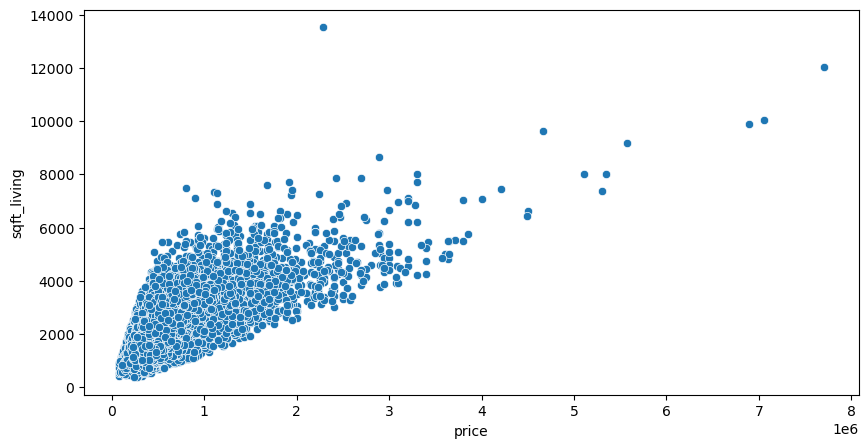

In [8]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price', y='sqft_living', data=df)

<Axes: xlabel='bedrooms', ylabel='price'>

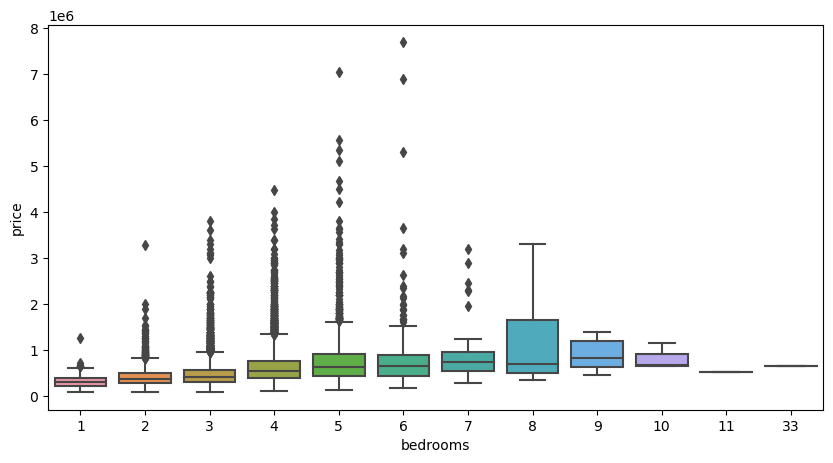

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(x='bedrooms', y='price', data=df)

In [10]:
len(df)*0.01

215.97

In [11]:
non_top_1_prec = df.sort_values('price', ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

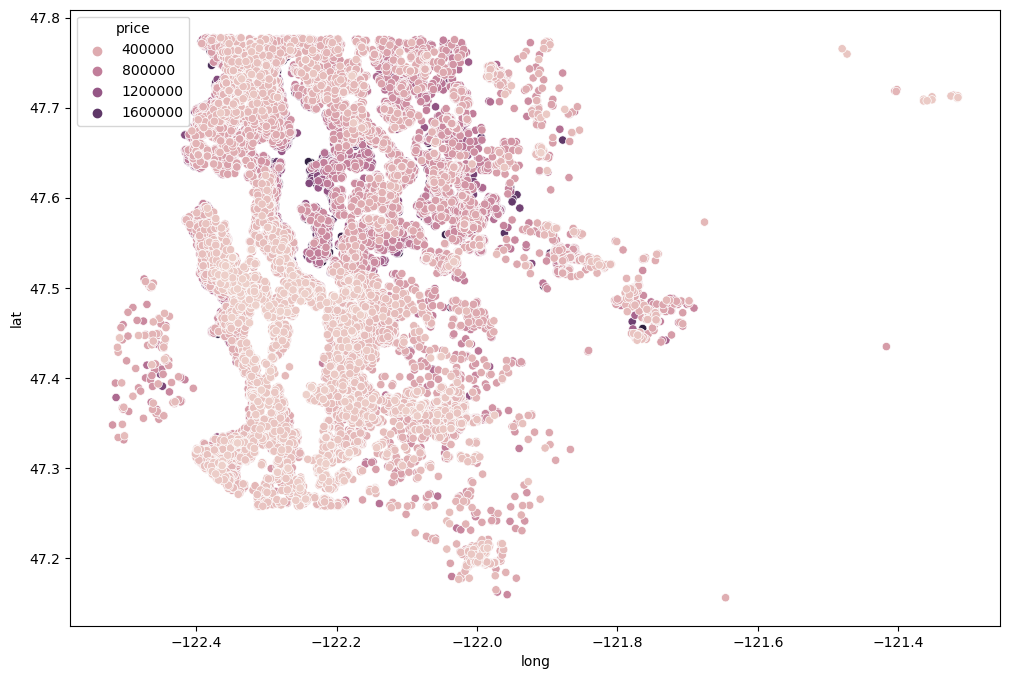

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=non_top_1_prec, hue='price')

In [13]:
df = df.drop('id', axis=1)

In [14]:
df['date'] = pd.to_datetime(df['date'])

In [15]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [16]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [17]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<Axes: xlabel='month', ylabel='price'>

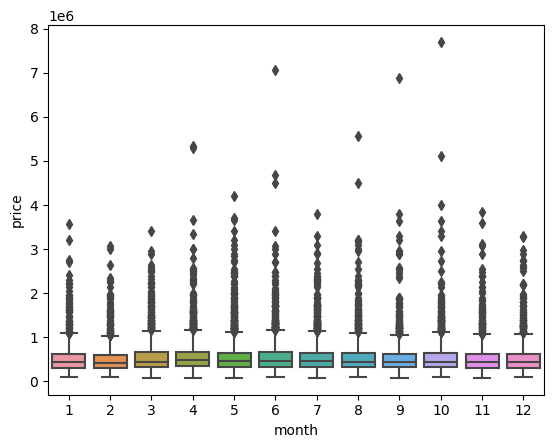

In [18]:
sns.boxplot(x = 'month', y='price', data=df)

C:\Users\modki\AppData\Local\Temp\ipykernel_4728\3834763391.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('month').mean()['price'].plot()


<Axes: xlabel='month'>

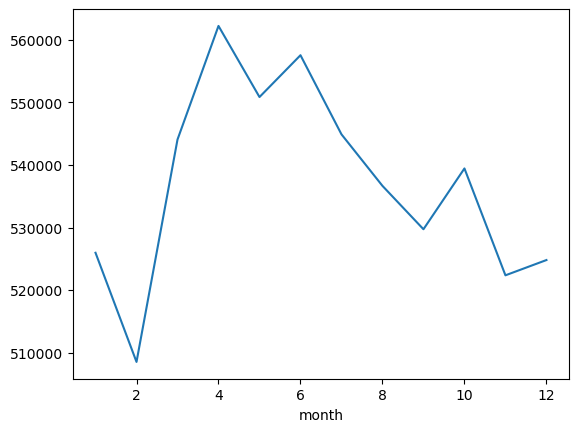

In [19]:
df.groupby('month').mean()['price'].plot()

C:\Users\modki\AppData\Local\Temp\ipykernel_4728\366114082.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('year').mean()['price'].plot()


<Axes: xlabel='year'>

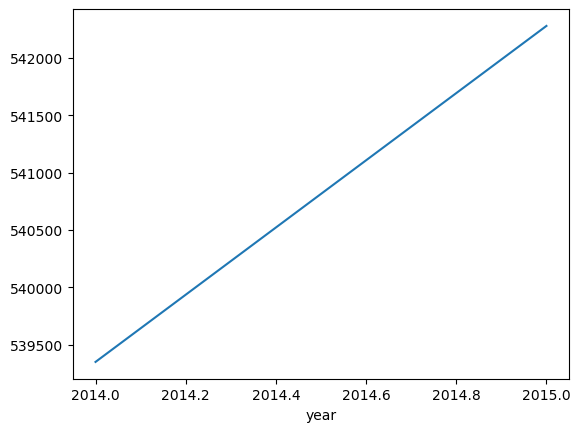

In [20]:
df.groupby('year').mean()['price'].plot()

In [21]:
df = df.drop('date', axis=1)

In [22]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [23]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [24]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [25]:
df = df.drop('zipcode', axis=1)

In [26]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [27]:
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [28]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
X_train = scaler.fit_transform(X_train)

In [34]:
X_test = scaler.transform(X_test) # NIE ZAKLADAMTY PRZYPUSZCZALNYCH INFORMACJI O NASZYM TEST_SECIE

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
X_train.shape # zawsze tyle neuronow co liczba featurow czyli 19

(15117, 19)

In [39]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1)) # output of predicated data

model.compile(optimizer='adam', loss='mse')

In [41]:
# validation data TYLKO zupdateuje wieght i bias
# im mniejszy batch_size tym dluzej to bedzie trwalo, ale tym mneijszy overflow
# 
#

model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), 
          batch_size=128,
         epochs = 400) 

Epoch 1/400
119/119 [==============================] - 0s 1ms/step - loss: 176170123264.0000 - val_loss: 110342348800.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 103573250048.0000 - val_loss: 96301965312.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 98829066240.0000 - val_loss: 94654889984.0000
Epoch 4/400
119/119 [==============================] - 0s 1ms/step - loss: 97047560192.0000 - val_loss: 92984909824.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 95233531904.0000 - val_loss: 91343093760.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 93415563264.0000 - val_loss: 89469804544.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 91515174912.0000 - val_loss: 87701880832.0000
Epoch 8/400
119/119 [==============================] - 0s 1ms/step - loss: 89571418112.0000 - val_loss: 85706629120.0000
Epoch 9/400
119/119 [========

119/119 [==============================] - 0s 1ms/step - loss: 36478734336.0000 - val_loss: 35149967360.0000
Epoch 69/400
119/119 [==============================] - 0s 1ms/step - loss: 36324683776.0000 - val_loss: 35026132992.0000
Epoch 70/400
119/119 [==============================] - 0s 1ms/step - loss: 36192714752.0000 - val_loss: 34869329920.0000
Epoch 71/400
119/119 [==============================] - 0s 1ms/step - loss: 36057702400.0000 - val_loss: 34743386112.0000
Epoch 72/400
119/119 [==============================] - 0s 1ms/step - loss: 35934330880.0000 - val_loss: 34662989824.0000
Epoch 73/400
119/119 [==============================] - 0s 1ms/step - loss: 35830194176.0000 - val_loss: 34529058816.0000
Epoch 74/400
119/119 [==============================] - 0s 1ms/step - loss: 35729395712.0000 - val_loss: 34454245376.0000
Epoch 75/400
119/119 [==============================] - 0s 1ms/step - loss: 35611021312.0000 - val_loss: 34308702208.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 1ms/step - loss: 32630693888.0000 - val_loss: 31136034816.0000
Epoch 136/400
119/119 [==============================] - 0s 1ms/step - loss: 32641888256.0000 - val_loss: 31080284160.0000
Epoch 137/400
119/119 [==============================] - 0s 1ms/step - loss: 32582543360.0000 - val_loss: 31328139264.0000
Epoch 138/400
119/119 [==============================] - 0s 1ms/step - loss: 32587339776.0000 - val_loss: 31000754176.0000
Epoch 139/400
119/119 [==============================] - 0s 1ms/step - loss: 32526764032.0000 - val_loss: 30973640704.0000
Epoch 140/400
119/119 [==============================] - 0s 1ms/step - loss: 32514291712.0000 - val_loss: 31068731392.0000
Epoch 141/400
119/119 [==============================] - 0s 1ms/step - loss: 32554975232.0000 - val_loss: 30935320576.0000
Epoch 142/400
119/119 [==============================] - 0s 1ms/step - loss: 32443310080.0000 - val_loss: 30883053568.0000
Epoch 143/400
11

119/119 [==============================] - 0s 1ms/step - loss: 31316324352.0000 - val_loss: 29554630656.0000
Epoch 202/400
119/119 [==============================] - 0s 1ms/step - loss: 31318360064.0000 - val_loss: 29528899584.0000
Epoch 203/400
119/119 [==============================] - 0s 1ms/step - loss: 31286784000.0000 - val_loss: 29506592768.0000
Epoch 204/400
119/119 [==============================] - 0s 1ms/step - loss: 31262834688.0000 - val_loss: 29531527168.0000
Epoch 205/400
119/119 [==============================] - 0s 1ms/step - loss: 31255967744.0000 - val_loss: 29486272512.0000
Epoch 206/400
119/119 [==============================] - 0s 1ms/step - loss: 31257917440.0000 - val_loss: 29463810048.0000
Epoch 207/400
119/119 [==============================] - 0s 1ms/step - loss: 31229833216.0000 - val_loss: 29477996544.0000
Epoch 208/400
119/119 [==============================] - 0s 1ms/step - loss: 31274444800.0000 - val_loss: 29447446528.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 30540244992.0000 - val_loss: 28595138560.0000
Epoch 268/400
119/119 [==============================] - 0s 1ms/step - loss: 30510692352.0000 - val_loss: 28548046848.0000
Epoch 269/400
119/119 [==============================] - 0s 1ms/step - loss: 30557761536.0000 - val_loss: 28531412992.0000
Epoch 270/400
119/119 [==============================] - 0s 1ms/step - loss: 30521554944.0000 - val_loss: 28541845504.0000
Epoch 271/400
119/119 [==============================] - 0s 1ms/step - loss: 30546124800.0000 - val_loss: 28493639680.0000
Epoch 272/400
119/119 [==============================] - 0s 1ms/step - loss: 30474496000.0000 - val_loss: 28540954624.0000
Epoch 273/400
119/119 [==============================] - 0s 1ms/step - loss: 30485241856.0000 - val_loss: 28520476672.0000
Epoch 274/400
119/119 [==============================] - 0s 1ms/step - loss: 30498588672.0000 - val_loss: 28455909376.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 29871421440.0000 - val_loss: 27716874240.0000
Epoch 334/400
119/119 [==============================] - 0s 1ms/step - loss: 29870442496.0000 - val_loss: 27735681024.0000
Epoch 335/400
119/119 [==============================] - 0s 1ms/step - loss: 29864646656.0000 - val_loss: 27723802624.0000
Epoch 336/400
119/119 [==============================] - 0s 1ms/step - loss: 29843439616.0000 - val_loss: 27715983360.0000
Epoch 337/400
119/119 [==============================] - 0s 1ms/step - loss: 29861124096.0000 - val_loss: 27688816640.0000
Epoch 338/400
119/119 [==============================] - 0s 1ms/step - loss: 29938814976.0000 - val_loss: 27766908928.0000
Epoch 339/400
119/119 [==============================] - 0s 1ms/step - loss: 29813280768.0000 - val_loss: 27674931200.0000
Epoch 340/400
119/119 [==============================] - 0s 1ms/step - loss: 29813516288.0000 - val_loss: 27757557760.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 29328134144.0000 - val_loss: 26978842624.0000
Epoch 400/400
119/119 [==============================] - 0s 1ms/step - loss: 29288241152.0000 - val_loss: 26987767808.0000


In [44]:
losses = pd.DataFrame(model.history.history)

<Axes: >

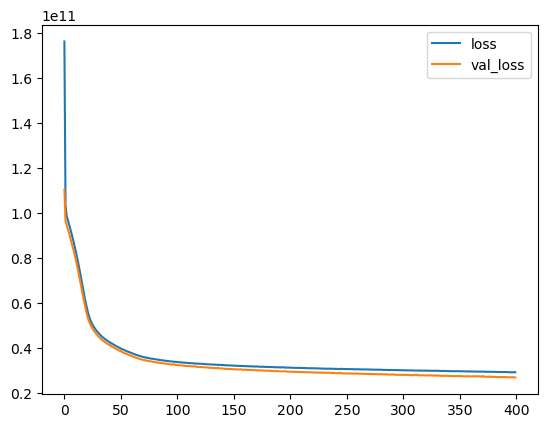

In [45]:
losses.plot()

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [47]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 590us/step


In [48]:
predictions

array([[399135.  ],
       [598711.75],
       [567825.6 ],
       ...,
       [385140.88],
       [567167.1 ],
       [680017.7 ]], dtype=float32)

In [50]:
np.sqrt(mean_squared_error(y_test, predictions))

164279.5348945031

In [52]:
mean_absolute_error(y_test, predictions)

102166.37297453704

In [54]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [55]:
explained_variance_score(y_test, predictions)

0.7966655786351093

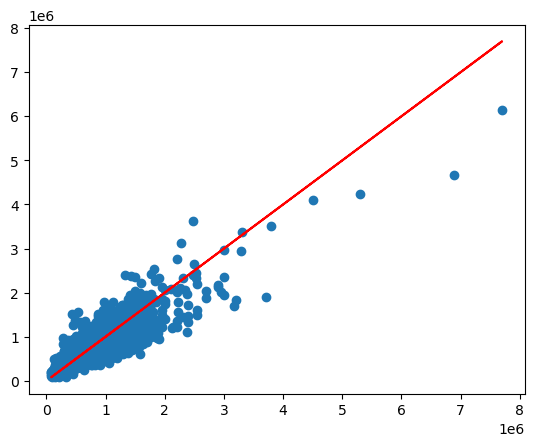

In [58]:
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [60]:
single_house = df.drop('price', axis=1).iloc[0]

In [64]:
single_house = scaler.transform(single_house.values.reshape(-1, 19)) # zamnieniamy z [] na [[]]

In [65]:
model.predict(single_house)

1/1 [==============================] - 0s 15ms/step


array([[292601.38]], dtype=float32)

In [66]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
